# Burgers' Equation

$$
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}=\nu\frac{\partial^2 u}{\partial x^2}\\ 
\frac{u_i^{n+1}-u_i^n}{\Delta t}+u_i^n\frac{u_i^n-u_{i-1}^n}{\Delta x}=\nu\frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{\Delta x^2}\\
u_i^{n+1}=u_i^n-u_i^n\frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)+\nu\frac{\Delta t}{\Delta x^2}(u_{i+1}^n-2u_i^n+u_{i-1}^n)
$$

## Initial and Boundary Conditions
#### anylatical solution
$$
u=-\frac{2\nu}{\phi}\frac{\partial\phi}{\partial x}+4\\
\phi=exp(\frac{-(x-4t)^2}{4\nu(t+1)})+exp(\frac{-(x-4t-2\pi)^2}{4\nu(t+1)})\\
$$
#### boundary condition
$$u(0)=u(2\pi)$$

In [1]:
import numpy as np
import sympy
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from sympy import init_printing
%matplotlib inline
# init_printing(use_latex=True)

In [2]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

In [3]:
phi_prime = phi.diff(x)
phi_prime

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

In [4]:
# u 的 解析解公式
u = -2 * nu * (phi_prime / phi) + 4
# 使用lambdify将公式转换成可移植性的函数
u_func = lambdify((t, x, nu), u)
# 例子 输入 t =1 x=4 nu=3
print(u_func(1,4,3))

3.49170664206445


In [5]:
# 声明变量
nx = 101 
nt = 100
dx = 2*np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
# 初始t
t = 0

# u 各个点的初始值
u = np.asarray([u_func(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

(0.0, 10.0)

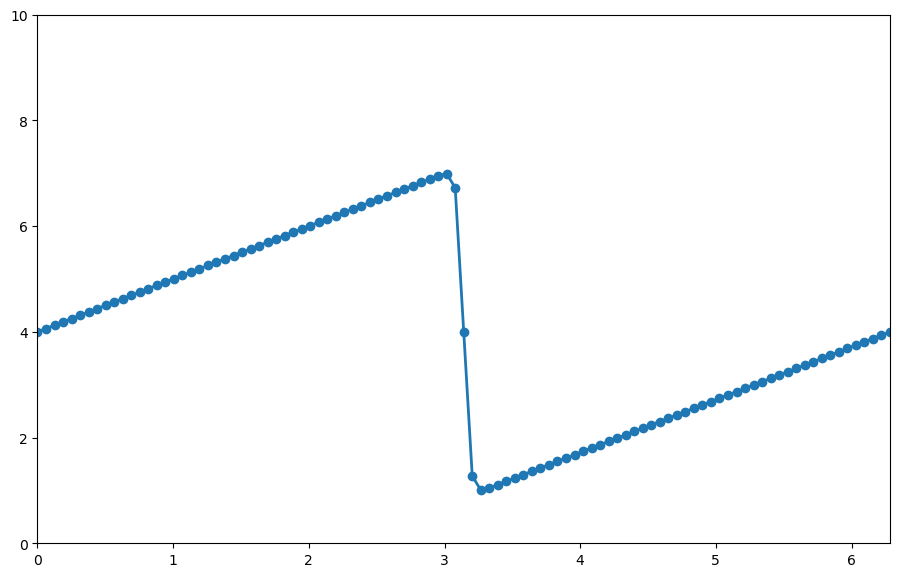

In [6]:
# 画出各个点在初始的图
plt.figure(figsize=(11,7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])

In [7]:
# 根据离散的公式计算最后各个点的u(数值解)
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - u[i-1]) + nu * dt / (dx**2) *\
            (un[i+1] - 2* un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
        (un[1] - 2 * un[0] + un[-2])
# 求最后u的解析解
u_analytical = np.asarray([u_func(nt*dt, xi, nu) for xi in x])

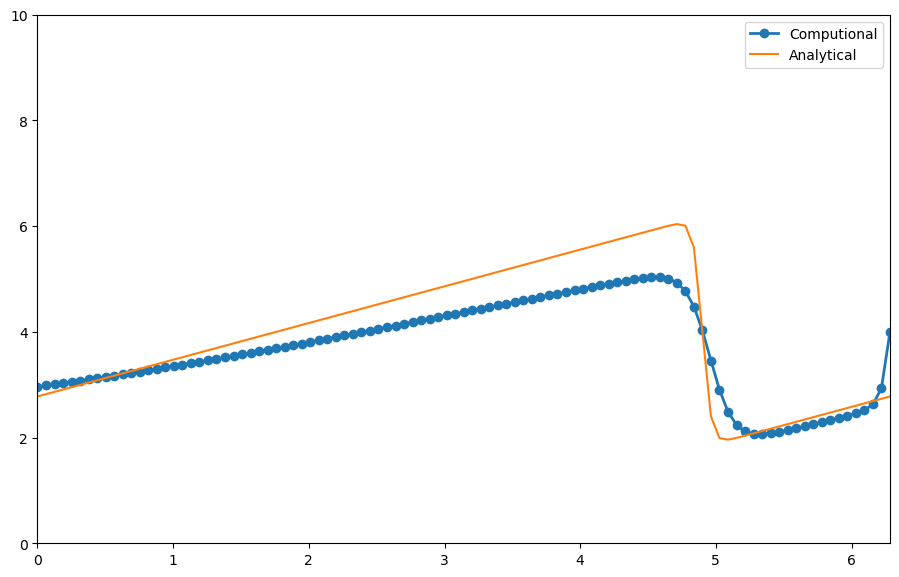

In [8]:
# 画出数值解和解析解的图像
plt.figure(figsize=(11,7), dpi=100)
plt.plot(x, u, marker='o', lw=2,label='Computional')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend()

In [11]:
u = np.array((0,1,2,3,4,5))
u[0:-1]

array([0, 1, 2, 3, 4])